In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:

#Pull Data from LSV File Path
file_path = 'RD/baseline/0.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)

#Time Vector
t = df.iloc[:, 0].to_numpy()[:10000]
baseline = np.zeros((7, len(t)))
#Voltage Information
baseline[0] = df.iloc[:, 1].to_numpy()[-10000:]

file_path = 'RD/baseline/45.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
baseline[1] = df.iloc[:, 1].to_numpy()[-10000:]

file_path = 'RD/baseline/90.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
baseline[2] = df.iloc[:, 1].to_numpy()

file_path = 'RD/baseline/135.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
baseline[3] = df.iloc[:, 1].to_numpy()

file_path = 'RD/baseline/180.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
baseline[4] = df.iloc[:, 1].to_numpy()

file_path = 'RD/baseline/comfort.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
baseline[5] = df.iloc[:, 1].to_numpy()

file_path = 'RD/baseline/full.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)
baseline[6] = df.iloc[:, 1].to_numpy()

#dt and FS (time step and sampling frequency if needed, we used a FS of 1000 Hz I believe)
dt = t[1]-t[0]
FS = 1/dt

0.001


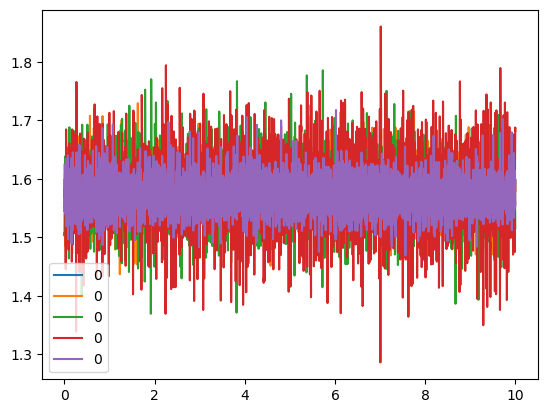

In [11]:
#initial Plot
for v in baseline[:5]:
    plt.plot(t, v, label = '0', alpha = 1)
plt.legend()
print(dt)

Text(0, 0.5, 'Average Absolute EMG (V)')

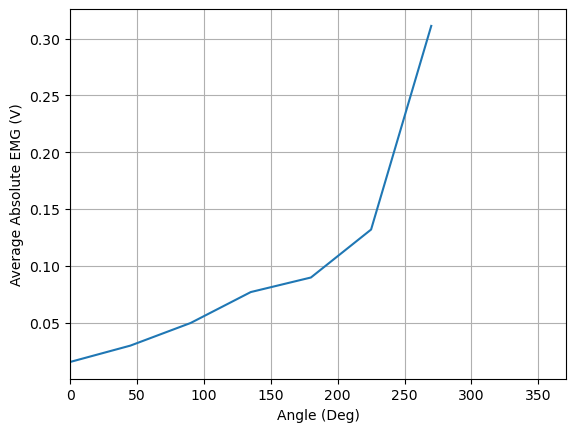

In [14]:
def shift(voltage):
    return voltage - np.average(voltage)
def absint(voltage):
    return np.sum(np.abs(voltage))

integral = np.zeros(7)
angle = np.arange(0, 271, 45)
for i in range(len(baseline)):
    baseline[i] = shift(baseline[i])
    integral[i] = absint(baseline[i])/len(baseline[i])

plt.xlim(0, 371)
plt.plot(angle, integral)
plt.grid()
plt.xlabel("Angle (Deg)")
plt.ylabel("Average Absolute EMG (V)")

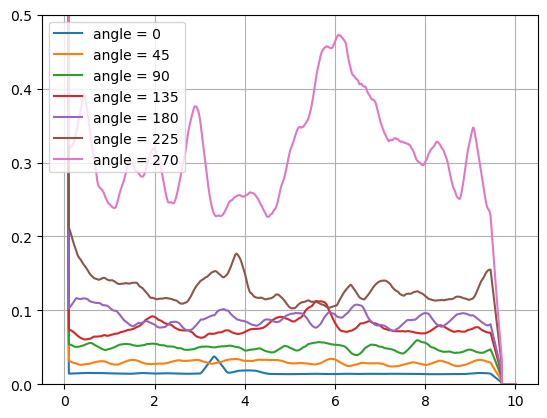

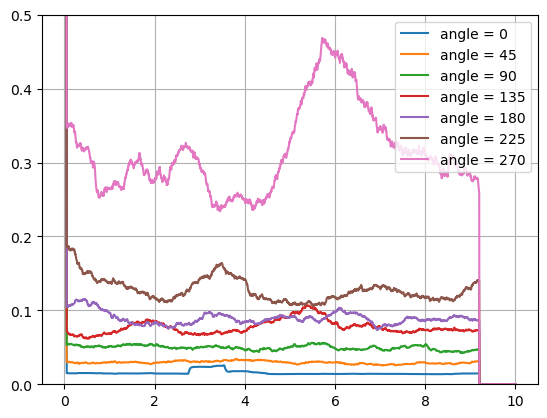

In [15]:
def runningAvg(lenavgms,voltage):
    values = np.zeros(len(voltage))
    numsamples = int(lenavgms/1000/dt)
    pad = np.linspace(0, numsamples)
    paddedv = np.insert(voltage, -1, pad)
    hn = np.linspace(-2, 2, numsamples)
    hn = np.e**(-1*hn**2)/np.sqrt(np.pi)
    for i in range(len(voltage)-numsamples):
        values[i] = np.sum(np.multiply(np.abs(paddedv[i:i+numsamples]), hn))/numsamples*5
    return values
def runningSum(lenavgms, voltage):
    values = np.zeros(len(voltage))
    numsamples = int(lenavgms/1000/dt)
    pad = np.linspace(0, numsamples)
    paddedv = np.insert(voltage, 0, pad)
    for i in range(len(voltage)-numsamples):
        values[i] = np.sum(np.abs(paddedv[i:i+numsamples]))/numsamples
    return values

for i in range(len(baseline)):
    values = runningSum(300, runningSum(300, baseline[i]))
    plt.plot(t, values, label = 'angle = ' + str(45*i))

plt.ylim(0, 0.5)
plt.legend()
plt.grid()
plt.figure()
for i in range(len(baseline)):
    values = runningSum(800, baseline[i])
    plt.plot(t, values, label = 'angle = ' + str(45*i))

plt.ylim(0, 0.5)
plt.legend()
plt.grid()

In [16]:
file_path = 'AJ/motion/m2.lvm'
df = pd.read_csv(file_path, sep='\t', skiprows=23, header=None)

#Time Vector
t = df.iloc[:, 0].to_numpy()
#Voltage Information
voltage = df.iloc[:, 1].to_numpy()

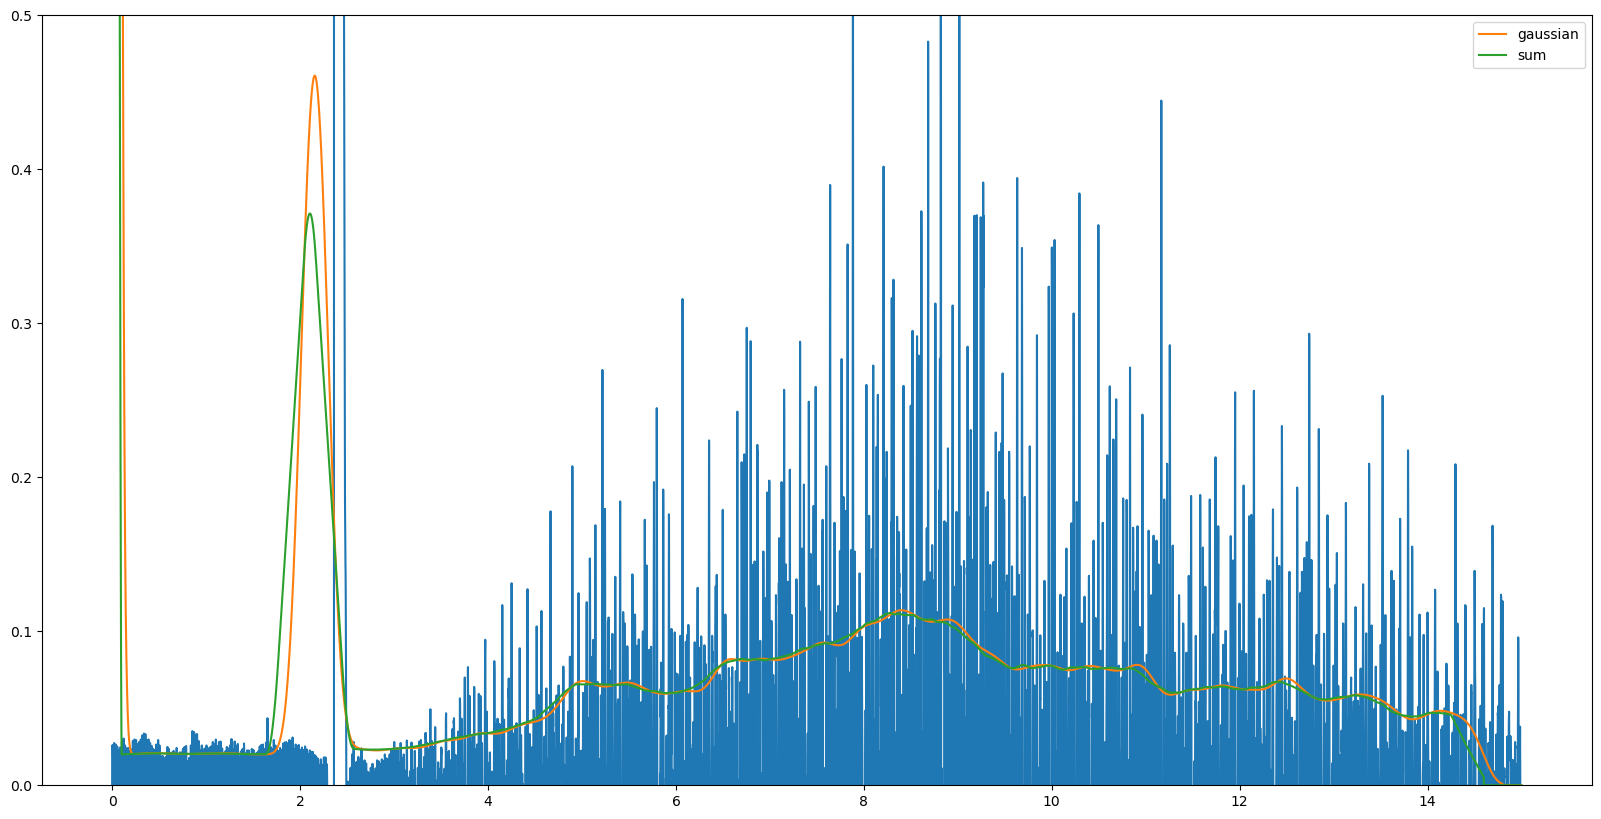

In [17]:
voltage = shift(voltage)
plt.figure(figsize = (20, 10))
plt.plot(t, voltage)

plt.ylim(0, 0.5)
plt.plot(t, runningSum(200, runningSum(200, runningSum(200, runningSum(200, runningSum(200, voltage))))), label = 'gaussian')
plt.plot(t, runningSum(400, runningSum(400, voltage)), label = 'sum')
plt.legend()

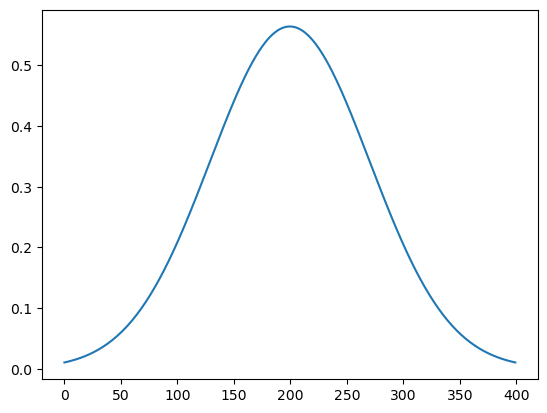

In [18]:
hn = np.linspace(-2, 2, 400)
hn = np.e**(-1*hn**2)/np.sqrt(np.pi)
plt.plot(hn)